In [1]:
import numpy as np
import random
import operator
import math
from matplotlib import pyplot as mp 
import cv2

In [2]:
class Gaussian:
    def __init__(self, mean, variance):
            self.mean = mean
            self.variance = variance

    def compute(self, x):
        return np.exp(-np.power(x - self.mean, 2) / (2 * np.power(self.variance, 2.)))

In [3]:
class Pixel:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def set(self, x, y):
        self.x = x
        self.y = y

    def get(self):
        return self.x, self.y

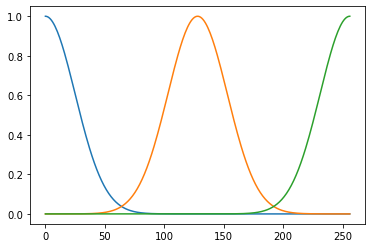

In [4]:
# fuzzification of three crisp variables small / medium / big


def fuzzification(small = 0, medium = 128, big = 256, variance = 25):
    
    u_small = Gaussian(small, variance)
    u_medium = Gaussian(medium, variance)
    u_big = Gaussian(big, variance)

    member_ship_functions = {
       "u_small": u_small,
       "u_medium": u_medium,
       "u_big": u_big
    }
    
    return member_ship_functions

#print(x_values)
member_ship_functions = fuzzification()
x_values = np.linspace(0, 256, 256)
mp.plot(x_values, member_ship_functions['u_small'].compute(x_values))
mp.plot(x_values, member_ship_functions['u_medium'].compute(x_values))
mp.plot(x_values, member_ship_functions['u_big'].compute(x_values))

In [5]:
print(member_ship_functions['u_medium'].compute(128))

1.0


In [6]:
image = np.ones((8,8))
print(image)

[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


In [7]:
expanded_image = np.zeros((2*image.shape[0],2*image.shape[1]))
#print(expanded_image)
for i in range(0, image.shape[0]):
    for j in range(0, image.shape[1]):
        expanded_image[2*i][2*j] = image[i][j]
#print(expanded_image)

# navigate y values
for i in range(0, expanded_image.shape[0],2):
    for j in range(1, expanded_image.shape[1],2):
        expanded_image[i][j] = 4
#print(expanded_image)


# navigate x values
for i in range(1, expanded_image.shape[0],2):
    for j in range(0, expanded_image.shape[1],2):
        expanded_image[i][j] = 5
#print(expanded_image)

# navigate x y values
for i in range(1, expanded_image.shape[0],2):
    for j in range(1, expanded_image.shape[1],2):
        expanded_image[i][j] = 6
print(expanded_image)

[[1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4.]
 [5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6.]
 [1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4.]
 [5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6.]
 [1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4.]
 [5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6.]
 [1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4.]
 [5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6.]
 [1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4.]
 [5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6.]
 [1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4.]
 [5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6.]
 [1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4.]
 [5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6.]
 [1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4.]
 [5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6.]]


In [8]:
def get_values_x_state(pixel, image):
    A = image[pixel.y - 1][pixel.x - 2]
    B = image[pixel.y - 1][pixel.x]
    C = image[pixel.y - 1][pixel.x + 2]
    
    D = image[pixel.y + 1][pixel.x - 2]
    E = image[pixel.y + 1][pixel.x]
    F = image[pixel.y + 1][pixel.x + 2]
    
    a = np.absolute(A - F)
    b = np.absolute(B - E)
    c = np.absolute(C - D)
    
    return A,B,C,D,E,F,a,b,c

In [9]:
def get_values_y_state(pixel, image):
    A = image[pixel.y - 2][pixel.x - 1]
    B = image[pixel.y][pixel.x - 1]
    C = image[pixel.y + 2][pixel.x - 1]
    
    D = image[pixel.y - 2][pixel.x + 1]
    E = image[pixel.y][pixel.x + 1]
    F = image[pixel.y + 2][pixel.x + 1]
    
    a = np.absolute(A - F)
    b = np.absolute(B - E)
    c = np.absolute(C - D)
    
    return A,B,C,D,E,F,a,b,c

In [10]:
def get_values_xy_state(pixel, image):
    A = image[pixel.y - 1][pixel.x - 1]
    B = image[pixel.y][pixel.x - 1]
    C = image[pixel.y + 1][pixel.x - 1]
    
    D = image[pixel.y - 1][pixel.x + 1]
    E = image[pixel.y][pixel.x + 1]
    F = image[pixel.y + 1][pixel.x + 1]
    
    a = np.absolute(A - F)
    b = np.absolute(B - E)
    c = np.absolute(C - D)
    
    return A,B,C,D,E,F,a,b,c

In [11]:
# test

arr = [[1,2,3,4,5],
      [6,7,8,9,10],
      [11,12,13,14,15],
      [16,17,18,19,20]]
print(get_values_xy_state(Pixel(2,1), arr))

(2, 7, 12, 4, 9, 14, 12, 2, 8)


In [12]:
# compute weights <=> the degree of activation for every rule

def compute_weights(a, b, c, member_ship_functions):
    u_small_a = member_ship_functions['u_small'].compute(a)                      # indicates rate of how a is small
    u_medium_a = member_ship_functions['u_medium'].compute(a)                    # indicates rate of how a is medium
    u_big_a = member_ship_functions['u_big'].compute(a)                          # indicates rate of how a is big
    
    
    u_small_b = member_ship_functions['u_small'].compute(b)                      # indicates rate of how b is small
    u_medium_b = member_ship_functions['u_medium'].compute(b)                    # indicates rate of how b is medium
    u_big_b = member_ship_functions['u_big'].compute(b)                          # indicates rate of how b is big
    
    
    u_small_c = member_ship_functions['u_small'].compute(c)                      # indicates rate of how c is small
    u_medium_c = member_ship_functions['u_medium'].compute(c)                    # indicates rate of how c is medium
    u_big_c = member_ship_functions['u_big'].compute(c)                          # indicates rate of how c is big  
    
    # rules :
    # use min to represent 'and' operation in fuzzy values of variables
    alpha_1 = np.min(np.array([u_medium_a,u_big_b,u_big_c]))
    alpha_2 = np.min(np.array([u_big_a,u_big_b,u_medium_c]))
    alpha_3 = np.min(np.array([u_small_a,u_big_b,u_small_c]))
    alpha_4 = 1 - alpha_1 - alpha_2 - alpha_3
    
    #print(alpha_1, alpha_2, alpha_3, alpha_4)
    return alpha_1, alpha_2, alpha_3, alpha_4

In [13]:
arr = [[1  ,0   ,3   ,256  ,5 ],
       [6  ,0   ,8   ,256  ,10],
       [11 ,256 ,13  ,0    ,15],
       [16 ,17  ,18  ,19   ,20]]
print(get_values_xy_state(Pixel(2,1), arr))
A,B,C,D,E,F,a,b,c = get_values_xy_state(Pixel(2,1), arr)
alpha_1, alpha_2, alpha_3, alpha_4 = compute_weights(a, b, c, member_ship_functions)
print(alpha_1, alpha_2, alpha_3, alpha_4)

(0, 0, 256, 256, 256, 0, 0, 256, 0)
1.7000491099708284e-23 1.7000491099708284e-23 1.0 0.0


In [14]:
print(np.min(np.array([10,12,30,9])))

9


In [16]:
# defuzzification : center of mass appoach

def defuzzification(alpha_1, alpha_2, alpha_3, alpha_4, A, B, C, D, E, F):
    X = alpha_1 * (A + F) / 2 + alpha_2 * (C + D) / 2 + alpha_3 * (A + F + C + D) / 4 + alpha_4 * (B + E) / 2
    return X

In [16]:
print(4 * (2 + 2) / 2)

8.0


Populating the interactive namespace from numpy and matplotlib
10
10
10
10
17
13
16
22
19
20
21
21
21
21
21
22
13
21
18
14
19
19
16
16
15
16
17
15
25
23
23
23
25
23
11
12
15
10
11
12
16
15
15
14
14
15
18
20
21
20
22
22
19
18
18
17
21
17
7
8
11
7
7
9
10
10
10
10
10
10
11
11
12
13
13
14
26
26
26
50
42
46
65
60
63
63
63
62
88
80
85
104
105
101
110
106
109
61
65
62
38
37
35
32
38
38
50
53
49
109
117
104
120
125
118
63
60
59
23
16
22
32
32
35
57
52
55
35
36
36
35
35
44
73
80
77
113
114
104
121
119
113
107
101
109
75
71
75
60
54
59
59
57
57
55
54
53
53
53
53
61
62
61
68
67
60
61
54
59
53
54
55
83
85
90
107
111
110
110
110
112
114
114
114
97
97
93
91
87
92
112
117
119
127
130
130
122
125
115
101
102
98
98
100
103
104
105
108
104
107
105
98
97
94
86
89
88
70
68
69
50
50
54
31
30
36
25
21
29
32
32
29
70
67
68
163
158
167
123
119
121
28
17
31
8
11
7
17
16
17
83
86
90
173
175
177
128
125
128
99
101
100
80
82
83
88
87
83
96
94
94
142
147
146
174
177
179
147
146
152
45
52
46
5
1
4
44
49
8
8
8
7
14


51
53
75
78
90
123
134
134
98
92
81
42
36
37
29
35
40
40
29
32
46
45
45
57
54
56
59
62
59
54
50
50
60
58
60
66
64
65
74
75
73
86
93
90
97
97
100
103
112
115
102
108
112
76
79
81
28
27
24
50
47
55
90
95
104
98
97
97
97
99
101
100
105
107
79
82
80
59
52
46
70
71
71
114
122
128
134
140
143
115
116
119
74
72
70
52
49
53
47
51
50
38
37
39
15
14
12
13
10
9
26
27
22
37
44
37
67
60
63
98
100
103
127
129
131
73
73
76
69
68
81
126
134
143
128
137
130
135
136
135
136
138
134
147
134
136
112
109
112
31
37
42
99
94
96
164
166
165
176
174
16
15
16
19
19
20
19
19
19
19
19
20
20
20
20
20
16
16
18
10
8
8
5
3
5
5
6
6
6
7
7
9
8
8
9
8
9
9
9
8
8
9
9
8
8
8
10
11
13
18
19
21
23
24
22
20
22
22
13
12
14
8
7
9
7
7
7
7
7
7
7
7
8
9
8
8
15
12
12
39
41
42
94
90
96
143
151
149
157
155
156
92
83
87
48
48
49
25
28
34
10
11
11
5
7
8
9
9
9
9
10
10
7
9
8
7
11
13
14
15
15
31
31
35
47
50
45
58
59
52
82
74
80
130
138
134
96
96
92
39
35
40
26
37
31
30
19
24
39
41
46
60
53
54
58
63
61
52
48
47
62
60
61
67
65
64
71
71
71
82
91

62
118
121
124
148
157
163
159
163
166
178
175
169
140
135
134
154
153
151
156
157
156
134
135
134
70
68
74
90
96
93
169
171
177
134
133
138
125
125
129
172
180
14
14
15
15
14
13
15
16
14
14
14
13
13
12
12
12
17
17
18
18
19
20
22
22
23
23
23
24
24
25
25
25
25
26
28
29
28
27
25
24
20
19
18
16
14
12
11
10
10
8
6
7
7
9
8
7
10
10
9
9
10
9
8
6
10
9
7
7
7
8
8
8
9
11
11
9
7
8
8
8
11
11
12
15
18
19
19
18
17
21
19
31
28
27
52
50
50
70
75
74
87
89
87
110
108
109
113
114
118
92
89
87
72
75
75
76
75
77
68
67
70
76
81
77
147
146
149
223
225
221
215
213
214
215
213
210
222
221
220
222
220
212
201
192
201
101
100
103
121
126
126
151
158
155
148
145
149
115
112
111
81
85
87
65
67
73
66
64
65
70
70
70
73
74
76
81
79
78
77
79
85
91
93
92
77
80
76
56
57
56
82
86
82
120
128
120
114
118
112
78
79
79
77
77
87
102
110
109
102
99
98
86
84
81
76
76
78
77
77
75
66
67
66
50
50
51
41
41
40
30
27
25
17
20
17
12
11
11
9
8
13
30
33
33
72
73
76
116
117
116
163
163
156
169
167
165
178
178
177
134
141
141
152
152
150
1

23
20
23
37
37
44
75
77
77
78
82
91
73
67
65
52
46
51
49
51
53
57
59
58
56
56
57
47
46
46
46
47
48
49
49
49
52
54
55
54
57
57
44
48
48
38
34
36
32
30
32
31
31
30
26
23
25
26
25
29
63
60
64
111
112
106
115
115
114
114
113
110
107
103
100
92
91
88
74
72
72
60
61
62
41
46
46
39
44
45
39
34
33
23
22
23
10
5
8
13
12
16
24
29
29
60
59
19
17
17
18
17
15
14
15
8
10
11
11
12
13
15
17
16
16
17
17
17
18
20
21
21
19
19
21
14
15
14
12
11
11
11
10
11
12
12
13
15
14
12
12
12
11
9
8
7
6
5
4
7
3
4
6
5
7
9
11
13
14
14
14
10
9
8
7
7
7
8
8
7
8
8
8
7
7
7
8
9
8
8
8
8
8
8
8
16
16
17
20
22
22
23
24
23
40
40
40
53
53
56
76
71
72
90
88
86
96
94
92
92
95
89
90
85
77
100
97
105
199
211
210
219
226
224
201
204
205
197
198
199
212
211
214
232
233
231
224
223
226
224
217
214
214
211
202
95
96
95
38
46
50
64
61
64
49
50
47
33
33
32
33
34
33
29
25
34
35
36
37
37
37
38
38
40
33
33
37
34
27
25
25
41
40
44
71
76
80
80
84
84
70
66
67
59
53
57
53
53
54
55
57
56
55
56
57
39
40
41
42
43
44
45
45
49
52
53
53
52
54
52
38
44
46

135
149
151
147
151
148
149
118
124
119
94
87
88
47
39
42
15
8
12
40
39
44
88
94
95
100
110
105
136
138
6
7
8
8
11
11
13
20
23
17
22
22
18
21
21
16
14
15
17
16
15
14
16
17
19
25
27
27
29
28
26
27
28
30
32
33
33
32
29
27
32
34
35
30
33
33
25
31
26
24
23
28
25
30
28
24
25
25
17
16
20
15
14
16
12
11
11
9
8
9
10
11
9
9
8
9
10
10
10
9
11
11
11
11
11
10
10
10
9
10
11
12
14
16
17
18
17
14
12
14
16
17
19
22
22
21
18
14
16
13
12
11
94
97
109
197
207
207
216
211
214
199
198
204
224
229
225
225
216
216
204
203
205
223
223
222
218
222
224
227
229
228
229
227
225
224
225
223
222
221
214
108
104
113
14
19
25
26
28
28
21
20
19
19
21
23
24
26
26
30
30
25
31
31
30
28
24
21
32
28
30
44
42
41
67
69
72
62
65
67
47
42
41
37
38
38
49
53
50
67
69
69
69
70
68
61
56
58
40
40
38
33
26
29
32
29
31
35
34
31
33
35
36
37
34
33
31
30
28
27
27
27
30
28
29
20
17
22
18
19
15
30
30
31
46
50
52
65
57
60
93
94
94
122
124
119
138
135
136
148
151
147
153
149
146
121
125
117
94
87
86
40
38
40
12
6
11
43
42
46
91
98
100
105
1

31
51
52
47
50
49
47
43
45
44
44
42
44
44
41
42
59
57
66
66
63
63
42
40
37
18
16
19
16
15
14
12
12
12
13
14
15
16
15
15
14
14
14
14
15
15
15
15
14
14
13
12
14
14
14
14
14
15
15
15
14
15
15
15
11
12
12
27
31
28
154
149
150
218
222
221
193
198
193
185
181
173
162
155
152
153
143
158
204
218
217
223
227
226
207
203
202
188
186
185
171
167
166
154
154
153
162
160
155
155
155
156
156
155
156
155
157
157
126
127
126
99
102
100
73
73
73
65
69
70
53
52
51
29
28
23
37
36
32
31
29
30
32
34
34
33
31
29
30
26
26
26
25
26
25
22
25
26
26
23
24
21
23
28
30
31
32
33
34
29
32
31
23
28
29
25
22
24
27
29
28
29
31
31
34
36
35
33
32
32
31
31
30
30
30
31
32
31
30
31
32
31
28
25
27
26
26
27
22
25
24
20
22
19
29
27
29
41
46
45
61
59
60
67
65
67
50
51
47
33
31
36
32
28
30
29
27
32
61
71
71
113
114
114
126
127
127
127
131
126
152
147
21
25
22
25
30
29
30
36
36
31
41
44
37
36
31
30
26
26
27
27
27
26
26
25
28
26
27
28
27
28
29
28
27
30
33
36
33
51
53
48
56
56
55
55
54
54
49
46
47
51
52
55
74
73
77
71
69
69
48
47


62
62
60
58
57
56
62
63
65
67
69
70
72
74
72
71
63
68
65
47
43
46
30
30
32
34
36
34
31
28
23
17
20
20
20
21
18
22
22
23
32
35
35
43
46
45
64
64
69
84
85
89
105
108
109
132
130
130
173
173
167
194
181
180
180
178
177
175
172
170
166
167
172
168
171
170
170
170
171
164
165
165
157
159
162
149
149
150
147
147
145
140
140
141
129
126
125
121
122
117
113
110
112
91
89
92
107
106
108
111
112
111
106
107
107
85
85
82
57
55
61
62
62
73
106
105
104
131
128
122
109
105
105
35
39
43
51
55
49
69
65
60
65
68
68
53
59
57
58
62
57
43
45
37
23
27
24
15
18
16
13
12
14
10
14
14
8
8
8
9
9
10
12
13
7
10
14
13
20
20
20
18
23
24
25
26
27
28
28
28
30
32
34
37
39
39
38
36
37
35
34
33
32
32
31
31
36
34
31
30
32
34
37
38
35
34
35
33
31
32
37
40
35
49
52
54
53
54
52
38
42
42
55
60
63
81
85
83
96
95
99
105
105
106
135
133
22
23
23
20
20
21
21
20
25
26
28
28
28
28
27
27
30
30
30
29
27
26
26
26
25
24
22
22
23
24
26
32
27
30
45
43
46
59
59
59
65
65
66
67
66
63
61
59
57
61
65
69
72
75
76
77
75
73
63
66
64
48
44
47
32

26
26
27
27
30
28
29
33
36
34
30
28
28
24
23
27
32
33
33
32
32
31
28
26
26
32
35
35
45
43
46
53
50
54
97
98
17
17
17
17
17
16
14
14
12
9
6
5
5
5
5
6
6
6
6
14
15
17
26
26
27
40
42
38
53
53
54
73
65
66
76
73
72
81
80
82
76
76
73
64
56
56
55
54
63
67
71
68
57
56
55
36
41
44
45
47
46
42
43
47
36
32
36
39
43
45
70
72
76
97
98
96
78
86
82
106
107
107
125
123
118
127
126
124
126
126
129
129
131
132
127
128
125
116
112
113
112
109
108
107
104
105
49
50
43
28
24
22
65
65
73
154
163
167
199
203
202
214
216
214
210
207
206
194
194
194
155
158
157
101
101
101
141
145
144
178
183
180
160
158
150
127
126
129
114
105
112
150
165
158
203
200
204
157
153
153
67
72
72
111
108
100
98
92
102
86
89
91
121
117
117
120
119
125
89
81
91
62
64
63
124
116
117
97
87
81
37
37
33
27
28
30
33
31
37
48
58
56
68
67
68
30
36
33
28
26
25
18
21
20
9
11
10
9
7
7
8
9
9
9
9
10
10
10
10
11
13
15
16
15
18
21
20
21
23
24
22
22
22
21
20
21
22
24
25
25
25
25
25
25
26
26
29
28
29
32
34
32
29
28
28
25
23
27
31
33
33
33
33
32
29
2

88
101
98
97
61
51
49
32
34
39
95
99
102
129
123
118
173
177
188
208
215
217
219
218
210
231
227
228
228
228
224
200
202
204
146
143
150
107
111
110
102
104
103
88
86
85
69
70
62
76
80
80
86
85
77
70
62
71
85
93
101
114
110
115
52
59
59
84
84
85
100
108
101
108
112
104
91
87
93
94
95
91
93
92
90
103
105
106
127
120
126
143
142
143
161
164
162
185
186
187
200
204
207
208
210
210
210
210
210
211
211
210
215
214
218
213
215
219
210
213
218
218
218
226
223
227
231
209
218
220
186
180
173
102
97
93
15
16
19
6
10
12
13
11
18
19
18
16
15
14
15
17
17
17
19
20
30
77
85
86
135
135
134
132
135
132
150
145
5
8
9
9
10
10
9
11
11
8
15
12
14
24
24
22
35
33
36
39
40
36
34
36
36
37
36
38
45
48
50
52
54
53
51
49
48
49
50
51
66
67
64
88
83
83
91
90
93
100
100
102
92
89
94
113
123
122
134
138
129
150
148
146
170
169
170
153
156
156
154
154
154
128
121
124
120
128
124
128
130
137
144
146
146
122
119
123
134
134
130
136
133
133
141
140
137
194
206
199
147
146
146
77
80
77
73
65
73
159
166
164
240
241
238
14

76
73
84
120
115
114
121
120
122
104
108
107
101
101
99
99
100
97
103
101
101
102
105
109
108
103
104
112
117
116
137
136
137
167
171
172
178
176
179
167
164
163
149
148
149
144
138
138
182
185
185
213
212
216
214
214
214
216
216
216
217
219
222
223
223
224
224
225
225
225
225
225
224
223
224
229
234
230
142
144
145
7
11
9
14
14
18
21
24
30
94
91
102
152
147
150
143
145
144
133
139
135
135
136
135
126
127
128
148
146
14
23
22
27
35
37
35
43
44
37
42
34
35
36
34
32
51
48
48
56
52
55
70
68
67
90
94
90
101
96
94
92
98
97
86
92
88
76
70
74
58
60
57
48
50
45
76
75
72
151
152
148
169
169
170
86
89
87
92
90
93
174
176
175
147
146
153
91
95
100
134
138
134
139
133
136
145
147
148
163
159
163
138
142
136
85
89
88
134
137
137
205
201
206
212
212
206
156
156
152
123
123
126
95
104
101
86
83
88
108
110
108
121
121
125
198
195
196
210
217
217
98
92
103
81
82
81
90
86
85
54
47
55
138
141
133
239
242
239
242
243
242
234
226
228
222
217
218
191
180
177
150
149
153
159
161
162
184
188
187
196
192
198
1

193
195
193
174
175
175
167
170
173
210
212
217
230
231
236
232
231
225
203
194
209
188
195
201
211
224
220
233
225
223
213
213
208
151
146
146
80
80
80
58
57
61
72
77
76
75
74
74
71
74
75
70
72
78
75
79
80
94
92
90
128
124
121
155
149
143
118
114
118
72
72
78
54
60
65
93
99
102
161
158
157
206
208
204
220
218
224
231
231
229
231
233
226
231
235
233
238
228
229
225
235
217
116
101
118
2
10
3
91
85
86
143
144
139
170
161
156
163
163
160
145
151
148
138
141
138
134
132
130
129
131
132
133
133
133
120
120
119
130
132
20
27
25
23
30
31
29
36
34
40
52
51
58
74
76
73
86
86
84
79
73
72
70
65
69
74
75
75
56
55
53
54
53
50
58
54
56
80
87
85
84
78
86
91
103
97
41
38
39
44
43
45
148
150
151
96
101
99
97
95
94
155
152
154
78
85
84
91
93
98
146
144
144
136
134
137
138
140
142
152
152
152
133
127
129
96
97
97
98
98
105
189
190
190
232
226
229
241
247
243
244
242
240
229
226
223
209
210
210
187
194
190
178
179
175
184
177
181
168
160
165
110
117
123
95
86
96
130
123
120
167
171
164
180
172
174
179
18

41
61
62
56
76
75
77
125
121
127
108
111
115
131
136
142
147
142
143
130
130
131
98
95
97
60
59
62
129
129
135
200
191
197
236
241
237
247
249
247
240
235
233
231
229
227
201
196
194
205
207
209
233
233
233
240
243
239
137
138
138
77
73
75
134
129
130
152
155
154
166
161
160
162
161
156
150
148
141
124
116
117
67
68
66
62
67
60
60
57
66
66
62
60
21
28
18
76
83
74
181
176
179
154
151
144
25
22
28
34
31
25
68
69
65
80
84
76
81
79
74
170
178
178
167
160
152
139
137
132
125
131
122
111
107
106
85
89
91
89
91
90
110
112
110
113
109
114
77
79
80
46
49
47
63
63
61
141
138
147
204
206
208
227
226
224
235
231
232
240
245
246
181
177
184
38
32
33
5
1
4
25
14
20
106
105
109
174
171
174
167
159
170
160
158
156
154
153
159
167
172
169
159
157
158
144
148
149
143
140
136
123
121
121
113
113
111
114
113
114
105
107
112
129
125
35
36
34
35
23
22
25
58
52
49
101
100
97
129
135
131
141
142
147
142
154
160
143
147
160
141
142
143
134
134
126
106
104
104
91
93
100
104
105
106
97
100
101
107
114
104
106
10

184
226
226
224
215
218
217
212
212
211
220
218
224
222
225
221
185
183
180
137
137
126
57
47
49
75
77
76
98
105
106
82
84
82
71
72
69
74
72
75
90
93
91
100
100
97
125
122
130
199
200
198
228
224
223
200
212
208
104
108
113
23
30
23
22
17
16
143
146
144
170
164
165
169
168
169
164
162
165
167
166
165
167
168
164
158
154
153
153
153
152
156
153
153
147
147
151
147
148
147
142
142
140
135
134
134
129
126
128
120
122
120
112
111
112
110
111
108
99
101
102
122
124
25
33
35
30
52
54
55
54
48
49
49
51
44
91
84
85
103
102
107
116
120
118
121
124
127
110
108
114
114
122
117
118
122
123
123
126
122
113
109
112
103
102
98
94
92
91
91
88
86
50
57
61
73
69
66
67
59
59
57
58
57
34
33
31
37
38
37
65
64
61
67
64
55
54
54
65
72
75
81
92
96
94
78
77
74
79
78
78
93
92
89
77
78
80
98
90
107
160
154
154
217
217
214
254
251
254
248
249
249
223
231
234
233
230
228
227
227
227
225
222
223
187
184
174
78
75
80
82
95
90
89
85
74
68
58
54
26
25
26
45
40
44
81
84
87
135
145
147
125
123
125
99
103
106
123
132
135

102
122
124
21
20
20
23
27
24
24
28
27
28
72
72
71
148
139
142
154
156
149
129
127
128
112
113
116
110
113
115
108
106
110
110
111
110
96
94
96
92
93
93
76
77
75
78
87
80
86
81
86
70
65
70
37
39
45
86
82
82
84
81
74
49
50
47
29
30
29
25
23
27
34
39
30
42
46
35
33
30
35
41
57
54
61
61
66
74
69
72
71
76
65
67
61
69
83
91
91
120
122
125
91
86
94
122
126
125
221
220
218
254
249
250
252
253
254
247
250
243
232
230
235
213
211
209
166
165
171
173
186
182
227
224
223
239
235
234
245
245
239
221
225
219
191
190
188
176
177
182
179
182
180
167
170
164
149
151
148
161
161
163
146
148
147
123
131
136
73
78
80
58
64
60
55
58
52
60
64
67
53
58
58
62
60
60
53
52
55
28
26
29
30
39
38
32
32
32
38
37
40
40
41
41
64
69
67
64
47
53
43
32
29
47
48
65
118
132
133
139
159
144
110
110
106
76
65
67
75
81
88
152
160
167
160
159
158
158
159
161
163
162
164
164
164
165
168
167
164
163
163
166
159
162
164
155
158
160
145
146
145
144
142
140
138
137
143
139
137
140
142
140
136
131
128
124
120
118
118
115
111
108
1

143
150
149
153
151
153
138
139
137
119
119
122
117
134
132
104
106
102
74
72
69
76
79
79
59
56
57
38
35
31
35
36
31
20
17
15
43
42
42
62
65
62
52
57
55
47
47
47
47
47
48
49
49
47
50
52
52
57
63
63
58
57
55
52
52
54
55
55
56
60
60
63
34
34
32
29
24
27
33
28
28
23
21
22
36
34
37
41
40
41
42
45
46
72
71
74
78
85
88
97
99
82
86
77
72
78
80
78
83
77
79
89
93
93
121
124
125
156
158
156
193
189
200
202
204
207
213
215
213
209
211
210
195
187
188
186
189
186
196
198
200
217
211
220
173
177
170
153
145
144
151
151
148
121
119
130
96
95
92
86
84
91
98
100
104
110
108
108
111
113
115
116
118
125
134
131
129
145
149
150
179
169
168
170
172
173
173
176
178
177
176
172
172
172
169
163
159
161
154
152
155
144
145
145
141
139
133
117
114
109
106
104
107
127
128
127
153
151
155
158
161
165
166
169
164
158
161
161
153
150
154
144
144
149
145
144
143
143
142
142
140
139
137
135
135
137
127
130
127
130
134
132
150
159
158
187
182
180
198
197
193
189
184
186
168
164
170
150
149
33
30
31
30
27
25
26
26
32


155
157
147
150
142
141
138
137
143
140
145
148
154
157
159
164
168
165
178
178
176
175
173
172
187
187
40
37
37
39
34
40
37
32
30
39
73
76
84
164
164
167
186
184
183
158
154
151
125
130
129
98
100
92
33
39
46
83
84
84
152
143
149
134
135
139
126
125
128
107
107
111
83
82
79
61
59
62
80
77
89
101
103
101
93
88
85
79
79
83
92
98
97
66
62
62
47
46
45
49
51
48
52
57
61
69
68
66
72
72
76
83
82
87
86
89
84
50
51
46
31
29
35
14
16
16
9
6
3
15
25
25
17
18
22
20
18
18
17
17
13
9
8
11
14
16
12
19
20
21
27
30
33
39
48
49
67
67
69
88
89
92
108
109
107
111
111
115
128
129
121
169
165
158
174
173
171
163
162
164
165
168
169
165
163
165
170
173
171
167
166
165
165
167
161
160
158
155
146
149
147
141
148
143
139
141
145
146
146
147
149
149
148
149
149
148
146
145
146
146
147
148
135
129
126
125
122
120
136
132
130
148
152
151
158
158
156
153
150
154
159
164
164
166
167
166
166
167
165
163
164
159
154
154
157
158
159
159
158
157
156
156
156
157
157
156
151
154
155
154
145
149
147
141
144
143
149
147
1

76
63
64
44
52
58
55
56
56
57
58
59
60
61
65
77
79
81
106
100
104
126
129
132
146
144
143
146
150
149
165
162
163
174
176
173
178
176
173
170
165
164
155
152
150
158
159
160
161
164
166
166
167
168
166
166
168
159
156
158
154
154
155
149
148
148
141
138
138
138
139
140
141
142
143
144
144
144
151
149
150
149
145
142
140
137
137
137
136
137
141
144
144
145
143
144
147
149
151
152
152
151
152
154
154
155
154
154
155
154
148
140
137
140
139
135
138
146
148
147
156
155
154
162
162
160
165
164
166
169
164
169
182
184
190
202
204
200
202
202
203
206
210
210
210
210
209
209
209
208
208
206
205
204
204
204
206
207
205
204
205
206
199
201
203
183
179
179
177
174
175
179
181
180
183
181
182
178
179
175
193
193
129
113
115
116
86
87
84
71
62
65
49
53
54
59
59
58
111
111
115
121
122
134
146
155
151
176
179
174
185
178
175
165
173
170
178
171
173
162
165
160
103
107
105
86
88
94
95
104
97
149
147
140
138
134
135
123
125
123
103
103
99
62
63
63
53
50
51
57
63
62
26
21
27
18
17
20
20
26
21
17
19
19
1

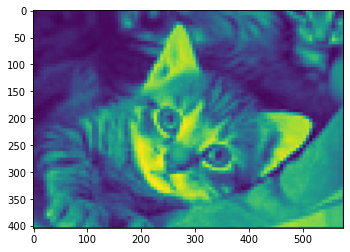

In [34]:
# ELA 3+3 algorithm :
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image = np.ones((8,8))
#print(image)

image = mpimg.imread('cat.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#image = cv2.resize(image, (100, 100))
member_ship_functions = fuzzification()

# initial double resolution image :
expanded_image = np.zeros((2*image.shape[0],2*image.shape[1]))
#print(expanded_image)
for i in range(0, image.shape[0]):
    for j in range(0, image.shape[1]):
        print(image[i][j])
        expanded_image[2*i][2*j] = image[i][j]
#print(expanded_image)

# navigate y values
for i in range(2, expanded_image.shape[0] - 2,2):
    for j in range(1, expanded_image.shape[1] - 2,2):
        A,B,C,D,E,F,a,b,c = get_values_y_state(Pixel(j, i), expanded_image)
        alpha_1, alpha_2, alpha_3, alpha_4 = compute_weights(a, b, c, member_ship_functions)
        expanded_image[i][j] = defuzzification(alpha_1, alpha_2, alpha_3, alpha_4, A, B, C, D, E, F)
#print(expanded_image)


# navigate x values
for i in range(1, expanded_image.shape[0] - 2,2):
    for j in range(2, expanded_image.shape[1] - 2,2):
        A,B,C,D,E,F,a,b,c = get_values_x_state(Pixel(j, i), expanded_image)
        alpha_1, alpha_2, alpha_3, alpha_4 = compute_weights(a, b, c, member_ship_functions)
        expanded_image[i][j] = defuzzification(alpha_1, alpha_2, alpha_3, alpha_4, A, B, C, D, E, F)
#print(expanded_image)

# navigate x y values
for i in range(1, expanded_image.shape[0] - 2,2):
    for j in range(1, expanded_image.shape[1] - 2,2):
        A,B,C,D,E,F,a,b,c = get_values_xy_state(Pixel(j, i), expanded_image)
        alpha_1, alpha_2, alpha_3, alpha_4 = compute_weights(a, b, c, member_ship_functions)
        expanded_image[i][j] = defuzzification(alpha_1, alpha_2, alpha_3, alpha_4, A, B, C, D, E, F)
#print(expanded_image)


imgplot = plt.imshow(expanded_image)
plt.show()

In [35]:
cv2.imwrite('result.jpg',expanded_image)

True

Populating the interactive namespace from numpy and matplotlib


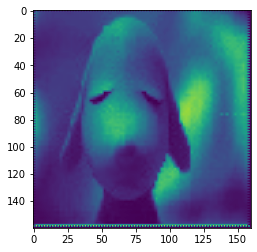

In [48]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


#image = np.ones((8,8))
#print(image)

#image = mpimg.imread('girl.jpg')
imgplot = plt.imshow(expanded_image)
plt.show()

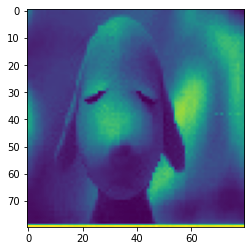

In [49]:

#image = mpimg.imread('girl.jpg')
imgplot = plt.imshow(image)
plt.show()

In [24]:
#print(expanded_image[0][:])

[159.   0. 159.   0. 159.   0. 158.   0. 158.   0. 157.   0. 157.   0.
 157.   0. 155.   0. 153.   0. 151.   0. 150.   0. 151.   0. 154.   0.
 158.   0. 160.   0. 162.   0. 165.   0. 169.   0. 173.   0. 175.   0.
 175.   0. 174.   0. 173.   0. 154.   0. 144.   0. 127.   0. 111.   0.
 100.   0.  96.   0.  97.   0.  98.   0. 100.   0. 102.   0. 106.   0.
 109.   0. 110.   0. 108.   0. 106.   0. 105.   0. 108.   0. 106.   0.
 105.   0. 104.   0. 105.   0. 109.   0. 113.   0. 115.   0. 121.   0.
 121.   0. 122.   0. 124.   0. 125.   0. 126.   0. 127.   0. 128.   0.
 128.   0. 128.   0. 129.   0. 129.   0. 129.   0. 130.   0. 130.   0.
 130.   0. 131.   0. 131.   0. 131.   0. 132.   0. 132.   0. 132.   0.
 133.   0. 133.   0. 135.   0. 135.   0. 135.   0. 134.   0. 134.   0.
 134.   0. 133.   0. 133.   0. 133.   0. 133.   0. 133.   0. 133.   0.
 133.   0. 133.   0. 133.   0. 133.   0. 133.   0. 133.   0. 132.   0.
 132.   0. 132.   0. 131.   0. 131.   0. 131.   0. 132.   0. 132.   0.
 132. 

In [50]:
cv2.imwrite('girlv2.jpg',expanded_image)
#image = mpimg.imread('girl.jpg')
cv2.imwrite('girlv3.jpg',image)

True

In [52]:
!jupyter nbconvert --to html Untitled.ipynb

[NbConvertApp] Converting notebook Untitled.ipynb to html
[NbConvertApp] Writing 893429 bytes to Untitled.html
